<a href="https://colab.research.google.com/github/BrunaMko/Case-tecnico/blob/main/Case_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Python e Machine Learning
Este conjunto de dados contém uma pesquisa de satisfação de passageiros de companhias aéreas. O **objetivo** é entender que fatores estão altamente correlacionados com um passageiro satisfeito (ou insatisfeito) e, se possível, **desenvolver uma solução para prever a satisfação dos passageiros**.

### Sobre os dados
- `Gender`: Gênero dos passageiros (Feminino, Masculino)
- `Customer Type`: Tipo de cliente (Loyal customer, disloyal customer)
- `Age`: Idade atual dos passageiros
- `Type of Travel`: Propósito do vôo dos passageiros (Personal Travel, Business Travel)
- `Class`: Classe de viagem no avião dos passageiros (Business, Eco, Eco Plus)
- `Flight distance`: A distância do voo desta viagem
- `Inflight wifi service`: Nível de satisfação do serviço de wifi a bordo (0=Não Aplicável; 1-5)
- `Departure/Arrival time convenient`: Nível de satisfação da conveniência do horário de partida/chegada
- `Ease of Online booking`: Nível de satisfação da reserva online
- `Gate location`: Nível de satisfação da localização do portão
- `Food and drink`: Nível de satisfação de comida e bebida
- `Online boarding`: Nível de satisfação do embarque online
- `Seat comfort`: Nível de satisfação do conforto do assento
- `Inflight entertainment`: Nível de satisfação do entretenimento a bordo
- `On-board service`: Nível de satisfação do serviço a bordo
- `Leg room service`: Nível de satisfação do serviço de espaço para as pernas
- `Baggage handling`: Nível de satisfação do manuseio de bagagem
- `Check-in service`: Nível de satisfação do serviço de check-in
- `Inflight service`: Nível de satisfação do serviço durante o voo
- `Cleanliness`: Nível de satisfação da limpeza
- `Departure Delay in Minutes`: Minutos de atraso na partida
- `Arrival Delay in Minutes`: Minutos de atraso na chegada
- `Satisfaction`: Nível de satisfação da companhia aérea (Satisfação, neutro ou insatisfação)

# Análise
Analise os dados com o objetivo de identificar que fatores estão altamente correlacionados com um passageiro satisfeito (ou insatisfeito).

In [ ]:
import pandas as pd

In [ ]:
base = pd.read_csv("train.csv")

In [ ]:
print(base)

        Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0                0   70172    Male     Loyal Customer   13  Personal Travel   
1                1    5047    Male  disloyal Customer   25  Business travel   
2                2  110028  Female     Loyal Customer   26  Business travel   
3                3   24026  Female     Loyal Customer   25  Business travel   
4                4  119299    Male     Loyal Customer   61  Business travel   
...            ...     ...     ...                ...  ...              ...   
103899      103899   94171  Female  disloyal Customer   23  Business travel   
103900      103900   73097    Male     Loyal Customer   49  Business travel   
103901      103901   68825    Male  disloyal Customer   30  Business travel   
103902      103902   54173  Female  disloyal Customer   22  Business travel   
103903      103903   62567    Male     Loyal Customer   27  Business travel   

           Class  Flight Distance  Inflight wifi se

In [ ]:
#Excluindo colunas irrelevantes
base = base.drop(columns=['Unnamed: 0','id'])

In [ ]:
#identifica todas as linhas que tem um valor vazio e exclui
base.info()
base = base.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [ ]:
#quantidade de clientes satisfeitos e não satisfeitos
display(base['satisfaction'].value_counts())
#em percentual
display(base['satisfaction'].value_counts(normalize = True).map("{:.1%}".format))

satisfaction
neutral or dissatisfied    58697
satisfied                  44897
Name: count, dtype: int64

satisfaction
neutral or dissatisfied    56.7%
satisfied                  43.3%
Name: proportion, dtype: object

In [ ]:
#Substituindo 'satisfied' por 1 e 'dissatisfied' por 0
base["satisfaction"]=[1 if each=="satisfied" else 0 for each in base.satisfaction]

In [ ]:
import matplotlib.pyplot as plt

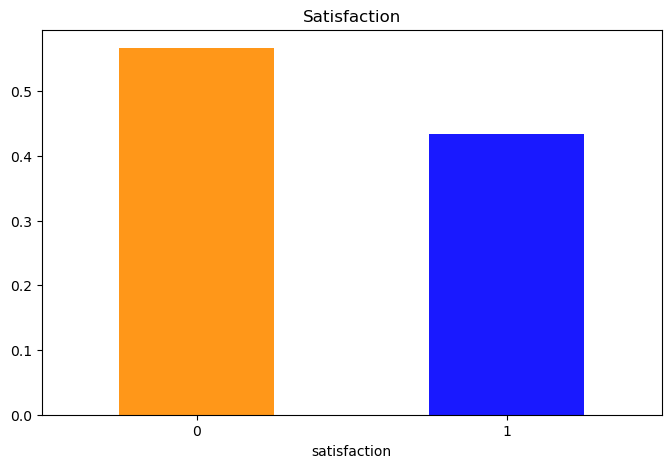

In [ ]:
fig = plt.figure(figsize = (8,5))
base['satisfaction'].value_counts(normalize = True).plot(kind='bar', color = ['darkorange', 'blue'], alpha = 0.9, rot=0)
plt.title('Satisfaction')
plt.show()

Nível de satisfação

    Gender  satisfaction
1    Male      0.439610
0  Female      0.427362


C:\Users\bru_m\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


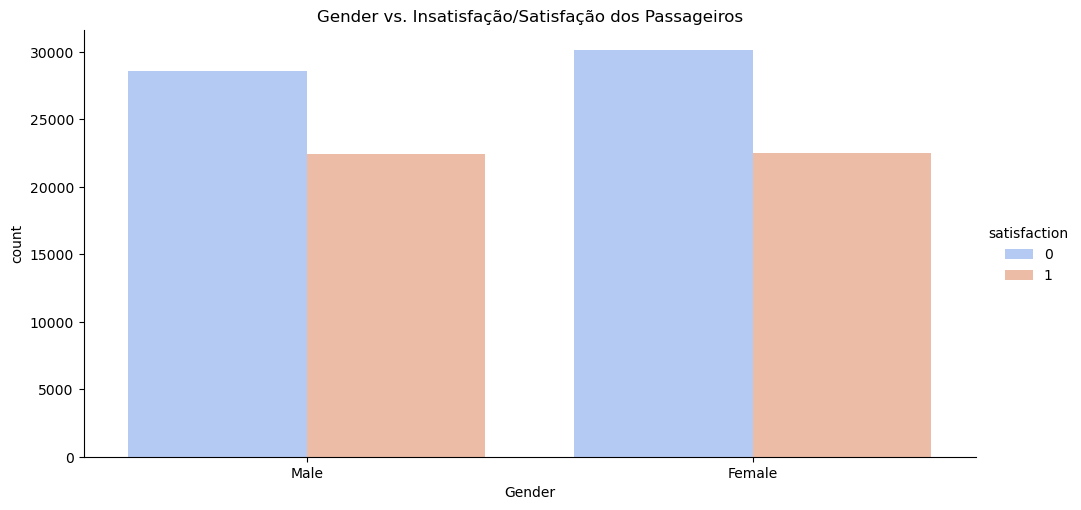

Nível de satisfação

        Customer Type  satisfaction
0     Loyal Customer      0.477345
1  disloyal Customer      0.236848


C:\Users\bru_m\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


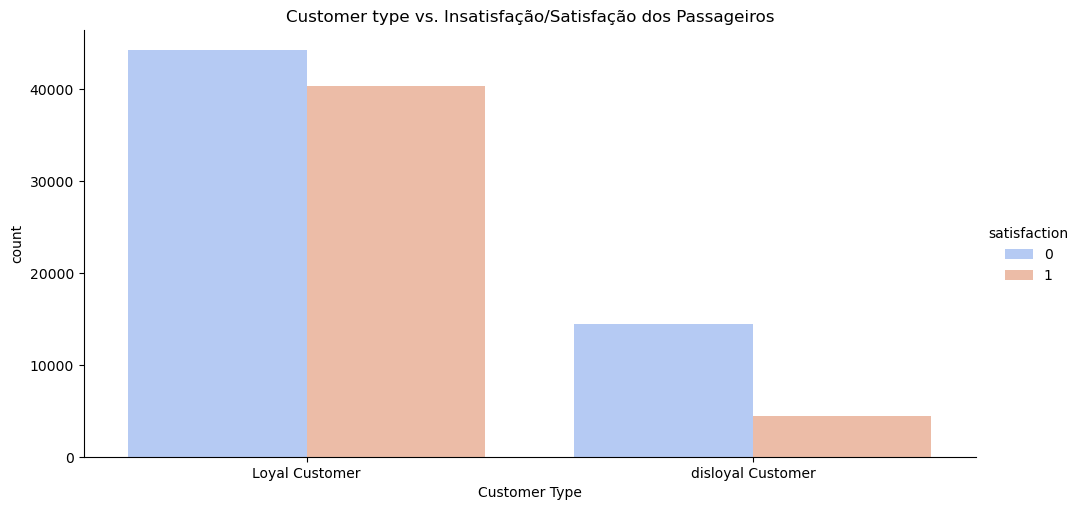

Nível de satisfação

     Type of Travel  satisfaction
0  Business travel      0.582579
1  Personal Travel      0.101559


C:\Users\bru_m\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


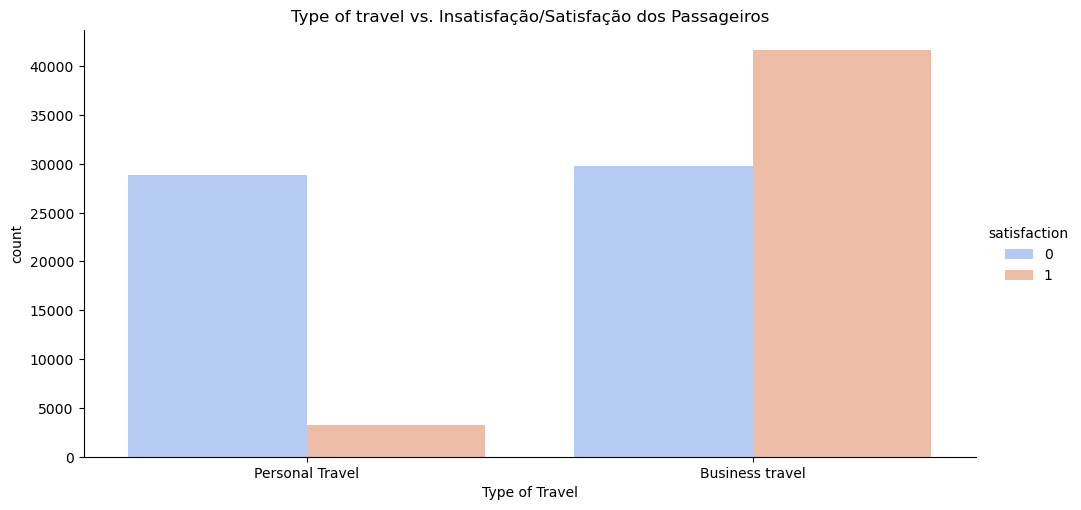

Nível de satisfação

       Class  satisfaction
0  Business      0.694285
2  Eco Plus      0.245849
1       Eco      0.186101


C:\Users\bru_m\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


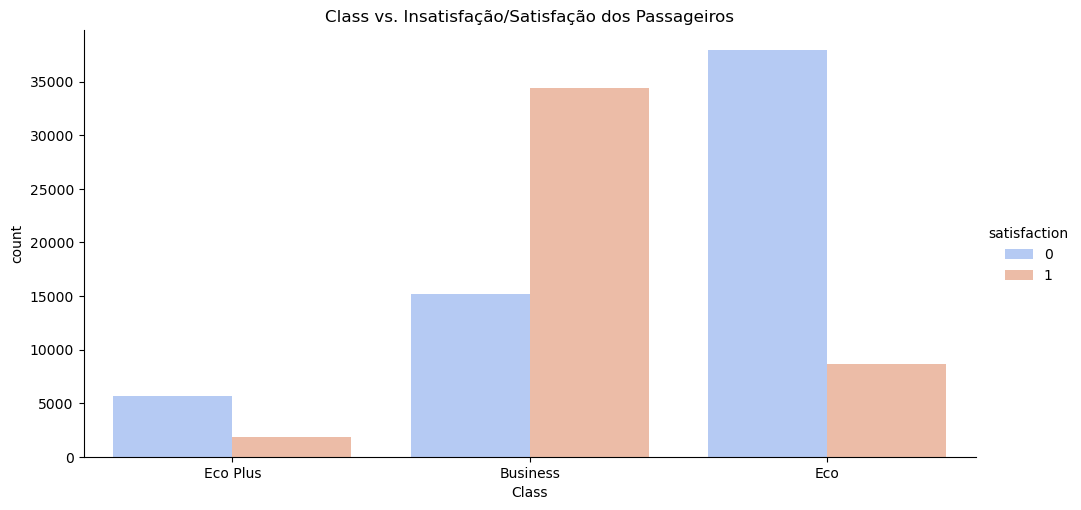

In [ ]:
import seaborn as sns

# Escolhendo as variáveis categóricas e a variável de satisfação
categorical_variables = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# Mostrar o nível de satisfação e plotar gráficos de categoria para cada variável categórica em relação à satisfação/insatisfação dos passageiros
for var in categorical_variables:
    result = base[[var, "satisfaction"]].groupby([var], as_index=False).mean().sort_values(by="satisfaction", ascending=False)
    print("Nível de satisfação\n\n", result)
    sns.catplot(x=var, hue='satisfaction', kind='count', data=base, palette='coolwarm', aspect=2)
    plt.title(f'{var.capitalize()} vs. Insatisfação/Satisfação dos Passageiros')
    plt.show()

Nível de satisfação

    Inflight wifi service  satisfaction
0                      0      0.997416
5                      5      0.990731
4                      4      0.598977
1                      1      0.325404
3                      3      0.250572
2                      2      0.248845


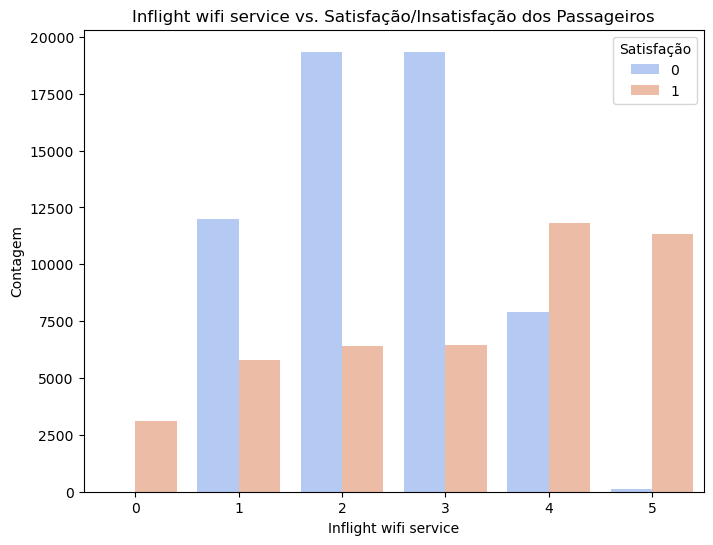

Nível de satisfação

    Departure/Arrival time convenient  satisfaction
1                                  1      0.486604
0                                  0      0.475614
2                                  2      0.445631
3                                  3      0.438306
5                                  5      0.425245
4                                  4      0.387807


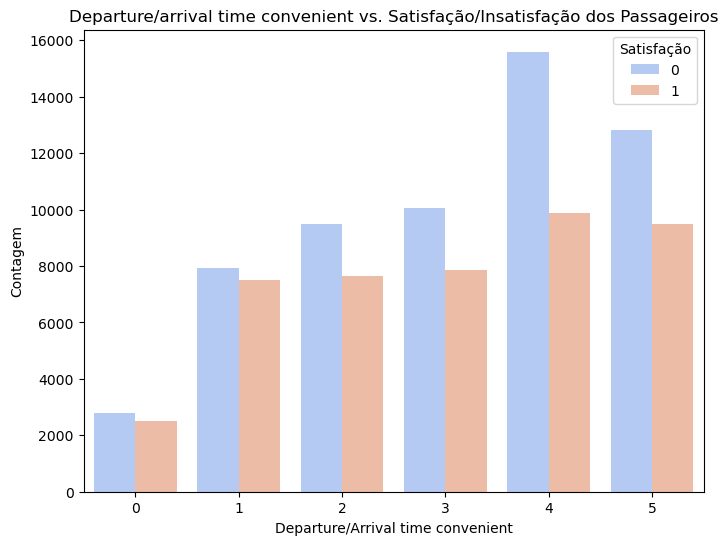

Nível de satisfação

    Ease of Online booking  satisfaction
5                       5      0.738183
0                       0      0.664655
4                       4      0.530859
1                       1      0.376102
3                       3      0.308248
2                       2      0.304190


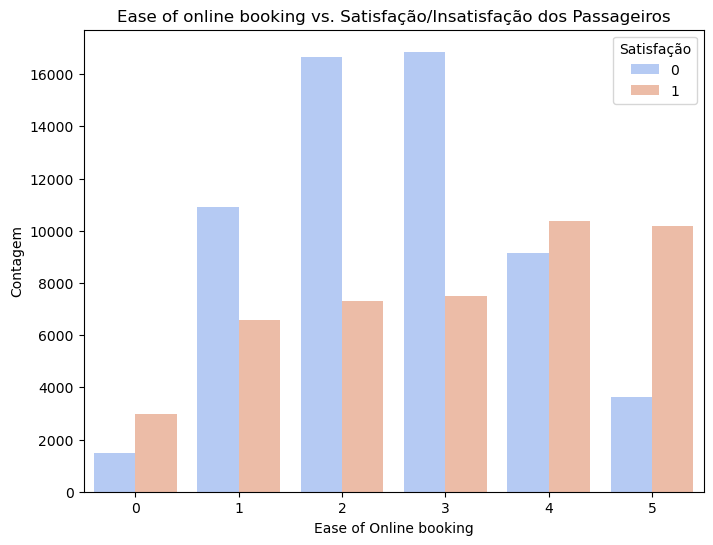

Nível de satisfação

    Gate location  satisfaction
0              0      1.000000
5              5      0.572306
1              1      0.495517
2              2      0.461384
4              4      0.388371
3              3      0.347116


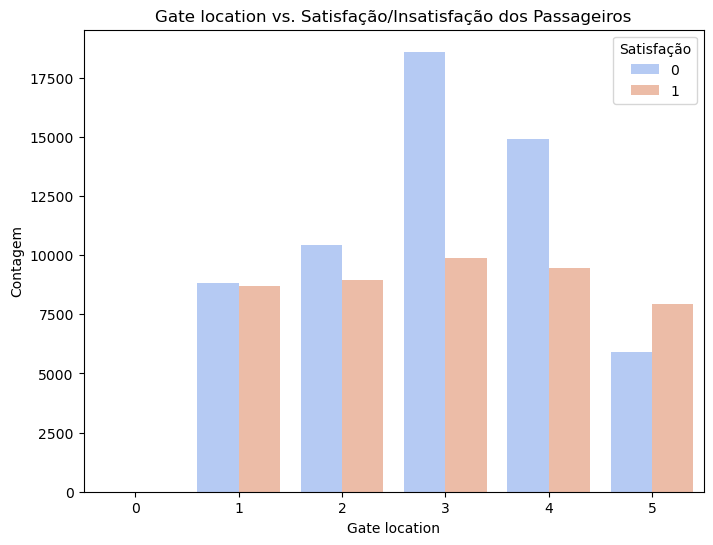

Nível de satisfação

    Food and drink  satisfaction
5               5      0.548766
4               4      0.525191
0               0      0.466667
3               3      0.396214
2               2      0.388311
1               1      0.200234


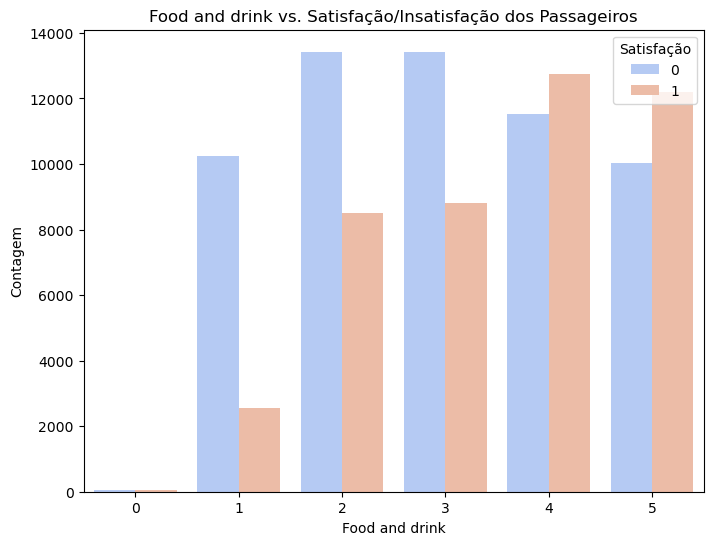

Nível de satisfação

    Online boarding  satisfaction
5                5      0.871780
4                4      0.623032
0                0      0.556612
1                1      0.138018
3                3      0.135854
2                2      0.115307


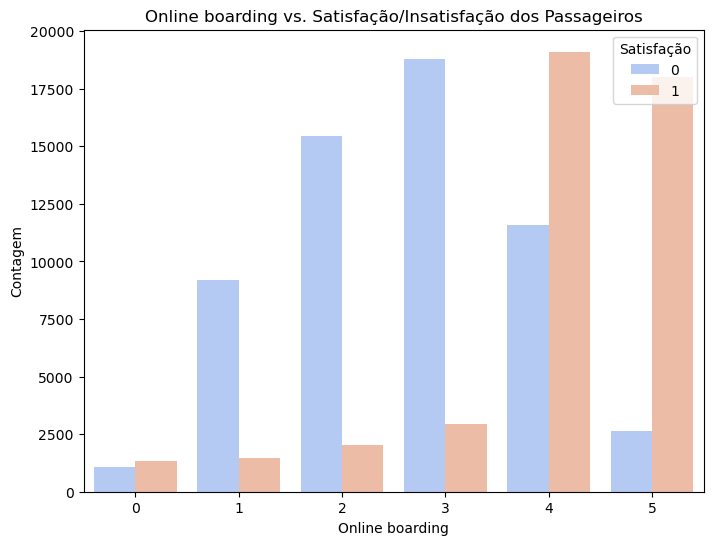

Nível de satisfação

    Seat comfort  satisfaction
5             5      0.650097
4             4      0.561044
2             2      0.224303
1             1      0.223589
3             3      0.211577
0             0      0.000000


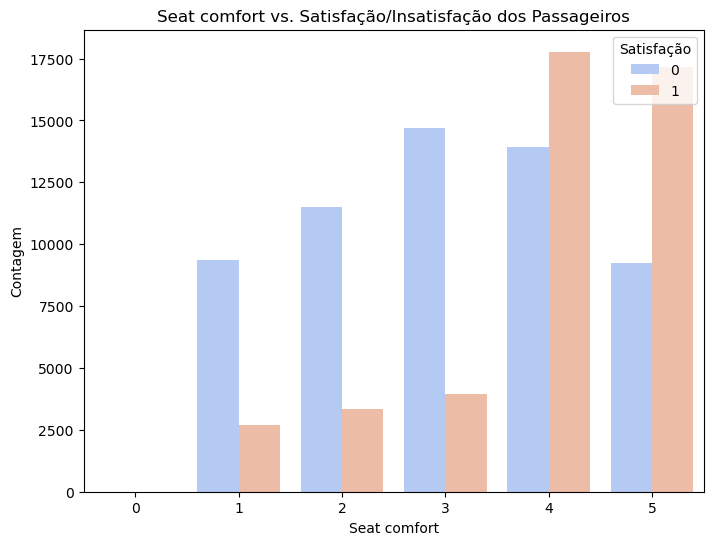

Nível de satisfação

    Inflight entertainment  satisfaction
5                       5      0.648519
4                       4      0.612033
3                       3      0.269706
2                       2      0.213323
1                       1      0.139860
0                       0      0.000000


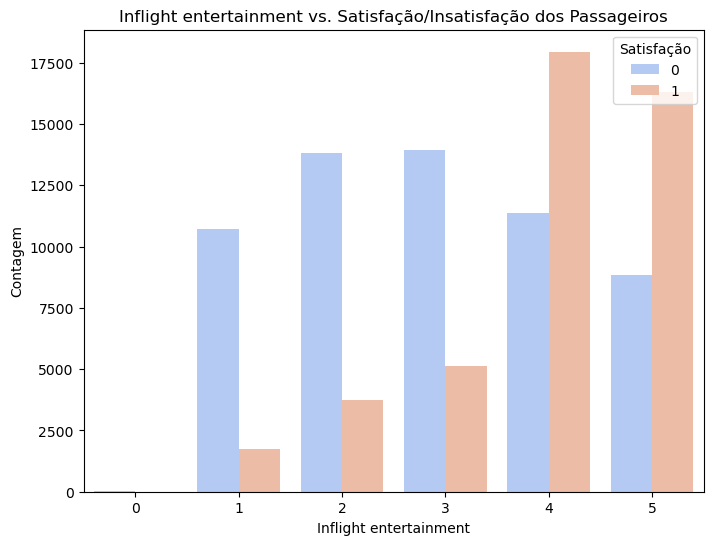

Nível de satisfação

    On-board service  satisfaction
5                 5      0.642385
4                 4      0.537062
3                 3      0.315635
2                 2      0.255741
1                 1      0.193627
0                 0      0.000000


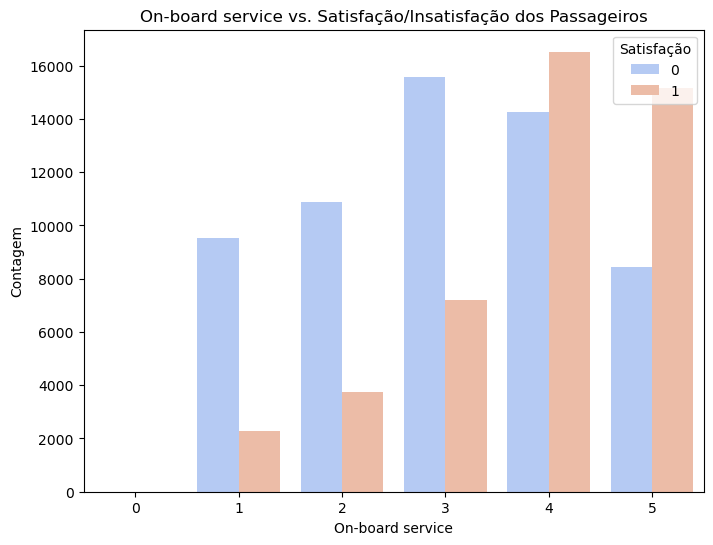

Nível de satisfação

    Leg room service  satisfaction
5                 5      0.614293
4                 4      0.582637
0                 0      0.353191
2                 2      0.274539
3                 3      0.272528
1                 1      0.202619


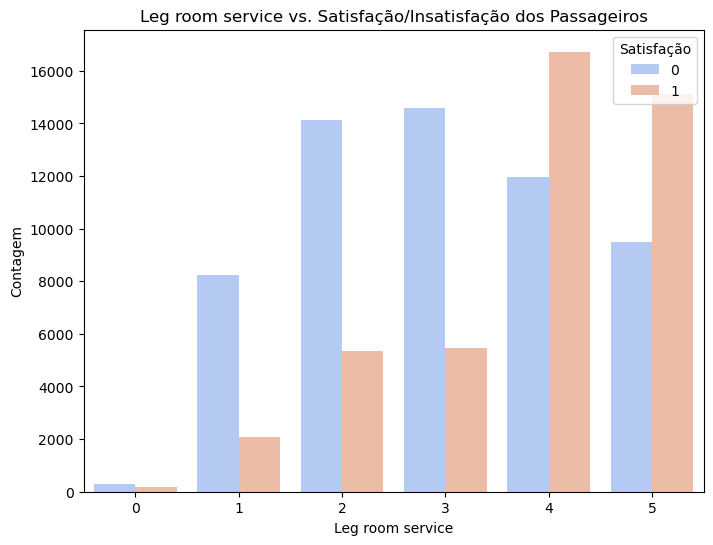

Nível de satisfação

    Baggage handling  satisfaction
4                 5      0.612822
3                 4      0.481006
0                 1      0.297383
1                 2      0.295829
2                 3      0.235717


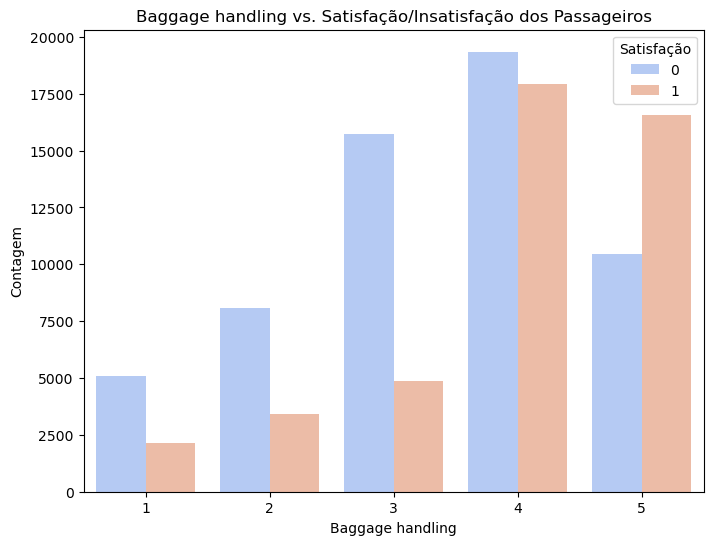

Nível de satisfação

    Checkin service  satisfaction
5                5      0.609652
4                4      0.459845
3                3      0.448477
2                2      0.252684
1                1      0.239340
0                0      0.000000


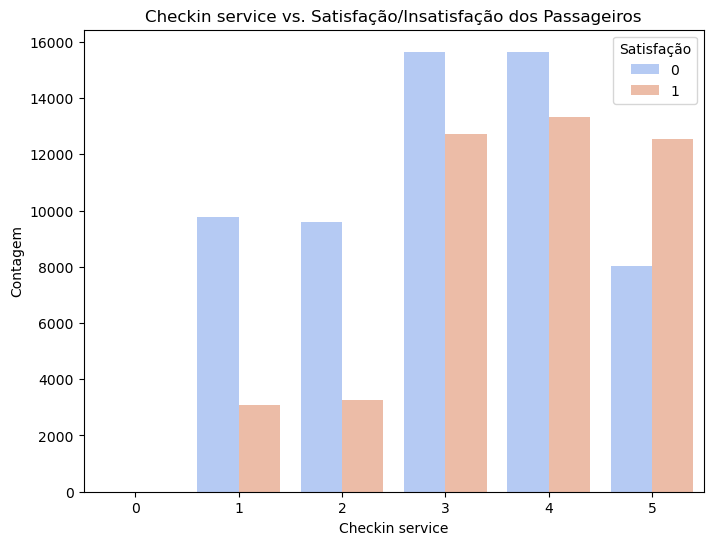

Nível de satisfação

    Inflight service  satisfaction
5                 5      0.610074
4                 4      0.477778
2                 2      0.301297
1                 1      0.289679
3                 3      0.238938
0                 0      0.000000


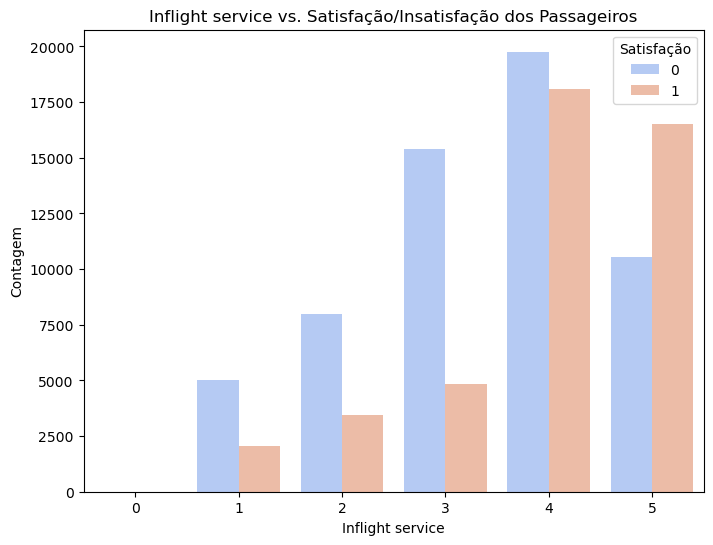

Nível de satisfação

    Cleanliness  satisfaction
5            5      0.608692
4            4      0.535535
3            3      0.431772
2            2      0.213171
1            1      0.196369
0            0      0.000000


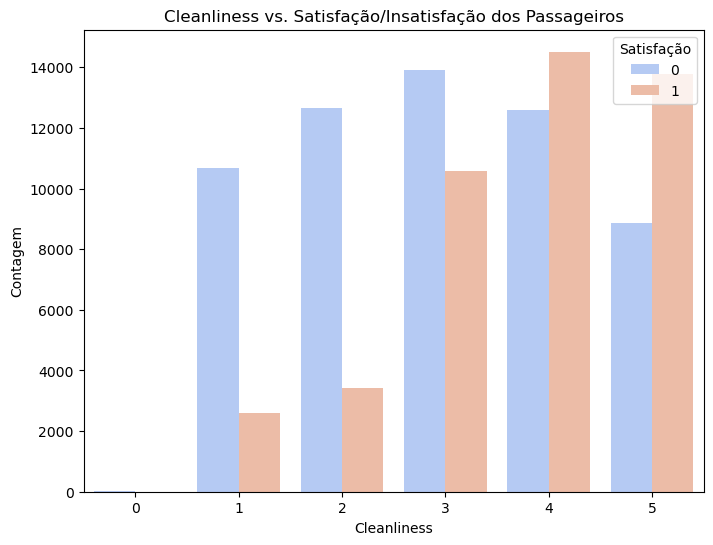

In [ ]:
#Verificando quantos clientes estão satisfeitos/insatisfeito no geral por nota de cada serviço especifico

variables_of_interest = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
                         'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                         'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling',
                         'Checkin service', 'Inflight service', 'Cleanliness']

# Mostrar o nível de satisfação e plotar gráficos de categoria para cada variável categórica em relação à satisfação/insatisfação dos passageiros
for var in variables_of_interest:
    result = base[[var, "satisfaction"]].groupby([var], as_index=False).mean().sort_values(by="satisfaction", ascending=False)
    print("Nível de satisfação\n\n", result)
    plt.figure(figsize=(8, 6))
    sns.countplot(x=var, hue='satisfaction', data=base, palette='coolwarm')
    plt.title(f'{var.capitalize()} vs. Satisfação/Insatisfação dos Passageiros')
    plt.xlabel(var)
    plt.ylabel('Contagem')
    plt.legend(title='Satisfação', loc='upper right')
    plt.show()

Nível de satisfação para Flight Distance Group 

   Flight Distance Group  satisfaction
4                 2001+      0.696275
3             1501-2000      0.580574
2             1001-1500      0.363260
0                 0-500      0.333189
1              501-1000      0.325212 

Nível de satisfação para Departure Delay Group 

   Departure Delay Group  satisfaction
0                  0-15      0.436726
1                 16-30      0.382187
2                 31-45      0.365795
3                 46-60      0.358198
4                   61+      0.357133 

Nível de satisfação para Arrival Delay Group 

   Arrival Delay Group  satisfaction
0                0-15      0.413028
3               46-60      0.359255
4                 61+      0.357172
2               31-45      0.354656
1               16-30      0.352725 



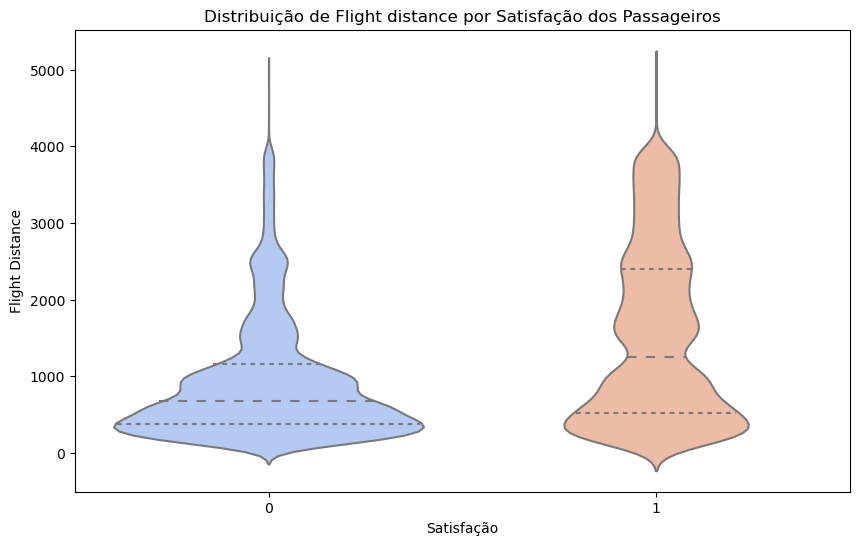

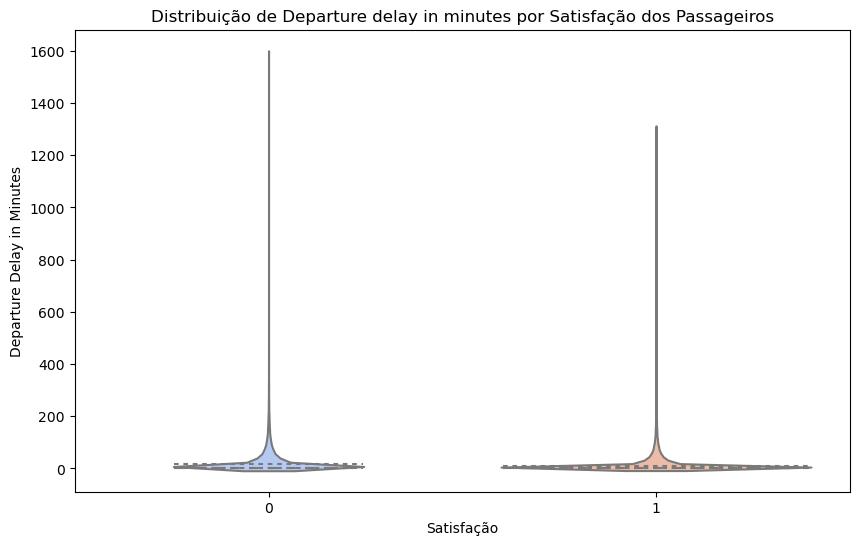

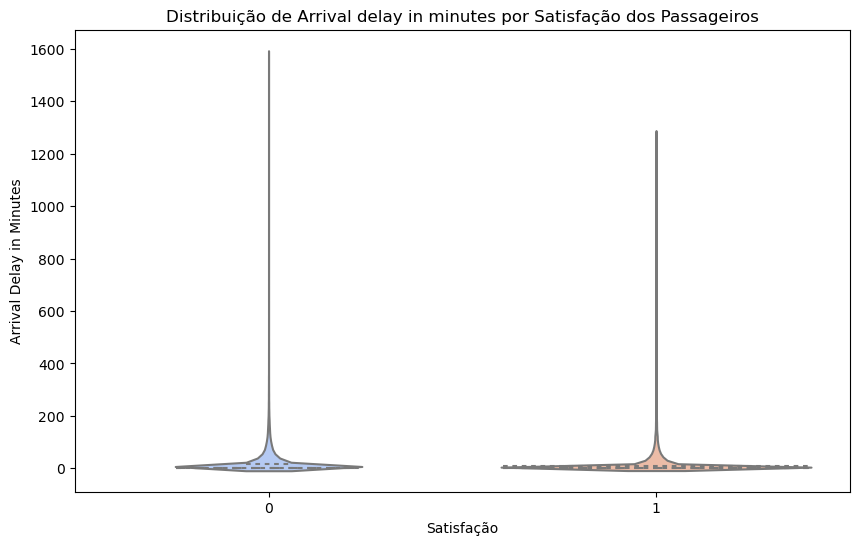

In [ ]:
base2 = base.copy()

numeric_variables = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

flight_distance_bins = [0, 500, 1000, 1500, 2000, float('inf')]
departure_delay_bins = [0, 15, 30, 45, 60, float('inf')]
arrival_delay_bins = [0, 15, 30, 45, 60, float('inf')]

# Definindo os rótulos para cada intervalo
labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001+']
labels2 =  ['0-15', '16-30','31-45','46-60', '61+']

# Agrupando as variáveis numéricas em intervalos
base2['Flight Distance Group'] = pd.cut(base2['Flight Distance'], bins=flight_distance_bins, labels=labels)
base2['Departure Delay Group'] = pd.cut(base2['Departure Delay in Minutes'], bins=departure_delay_bins, labels=labels2)
base2['Arrival Delay Group'] = pd.cut(base2['Arrival Delay in Minutes'], bins=arrival_delay_bins, labels=labels2)

# Lista de variáveis categóricas agrupadas
grouped_categorical_variables = ['Flight Distance Group', 'Departure Delay Group', 'Arrival Delay Group']

# Calcular o nível de satisfação para cada intervalo
for var in grouped_categorical_variables:
    result = base2[[var, "satisfaction"]].groupby([var], as_index=False).mean().sort_values(by="satisfaction", ascending=False)
    print("Nível de satisfação para", var, "\n\n", result, "\n")

# Plotar gráficos de dispersão para cada variável em relação à satisfação dos passageiros
for var in numeric_variables:

    # Calcular o nível de satisfação para cada intervalo

    plt.figure(figsize=(10, 6))
    sns.violinplot(x='satisfaction', y=var, data=base, palette='coolwarm', inner='quartile')
    plt.title(f'Distribuição de {var.capitalize()} por Satisfação dos Passageiros')
    plt.xlabel('Satisfação')
    plt.ylabel(var)
    plt.show()

**Correlação/Mapa de calor**

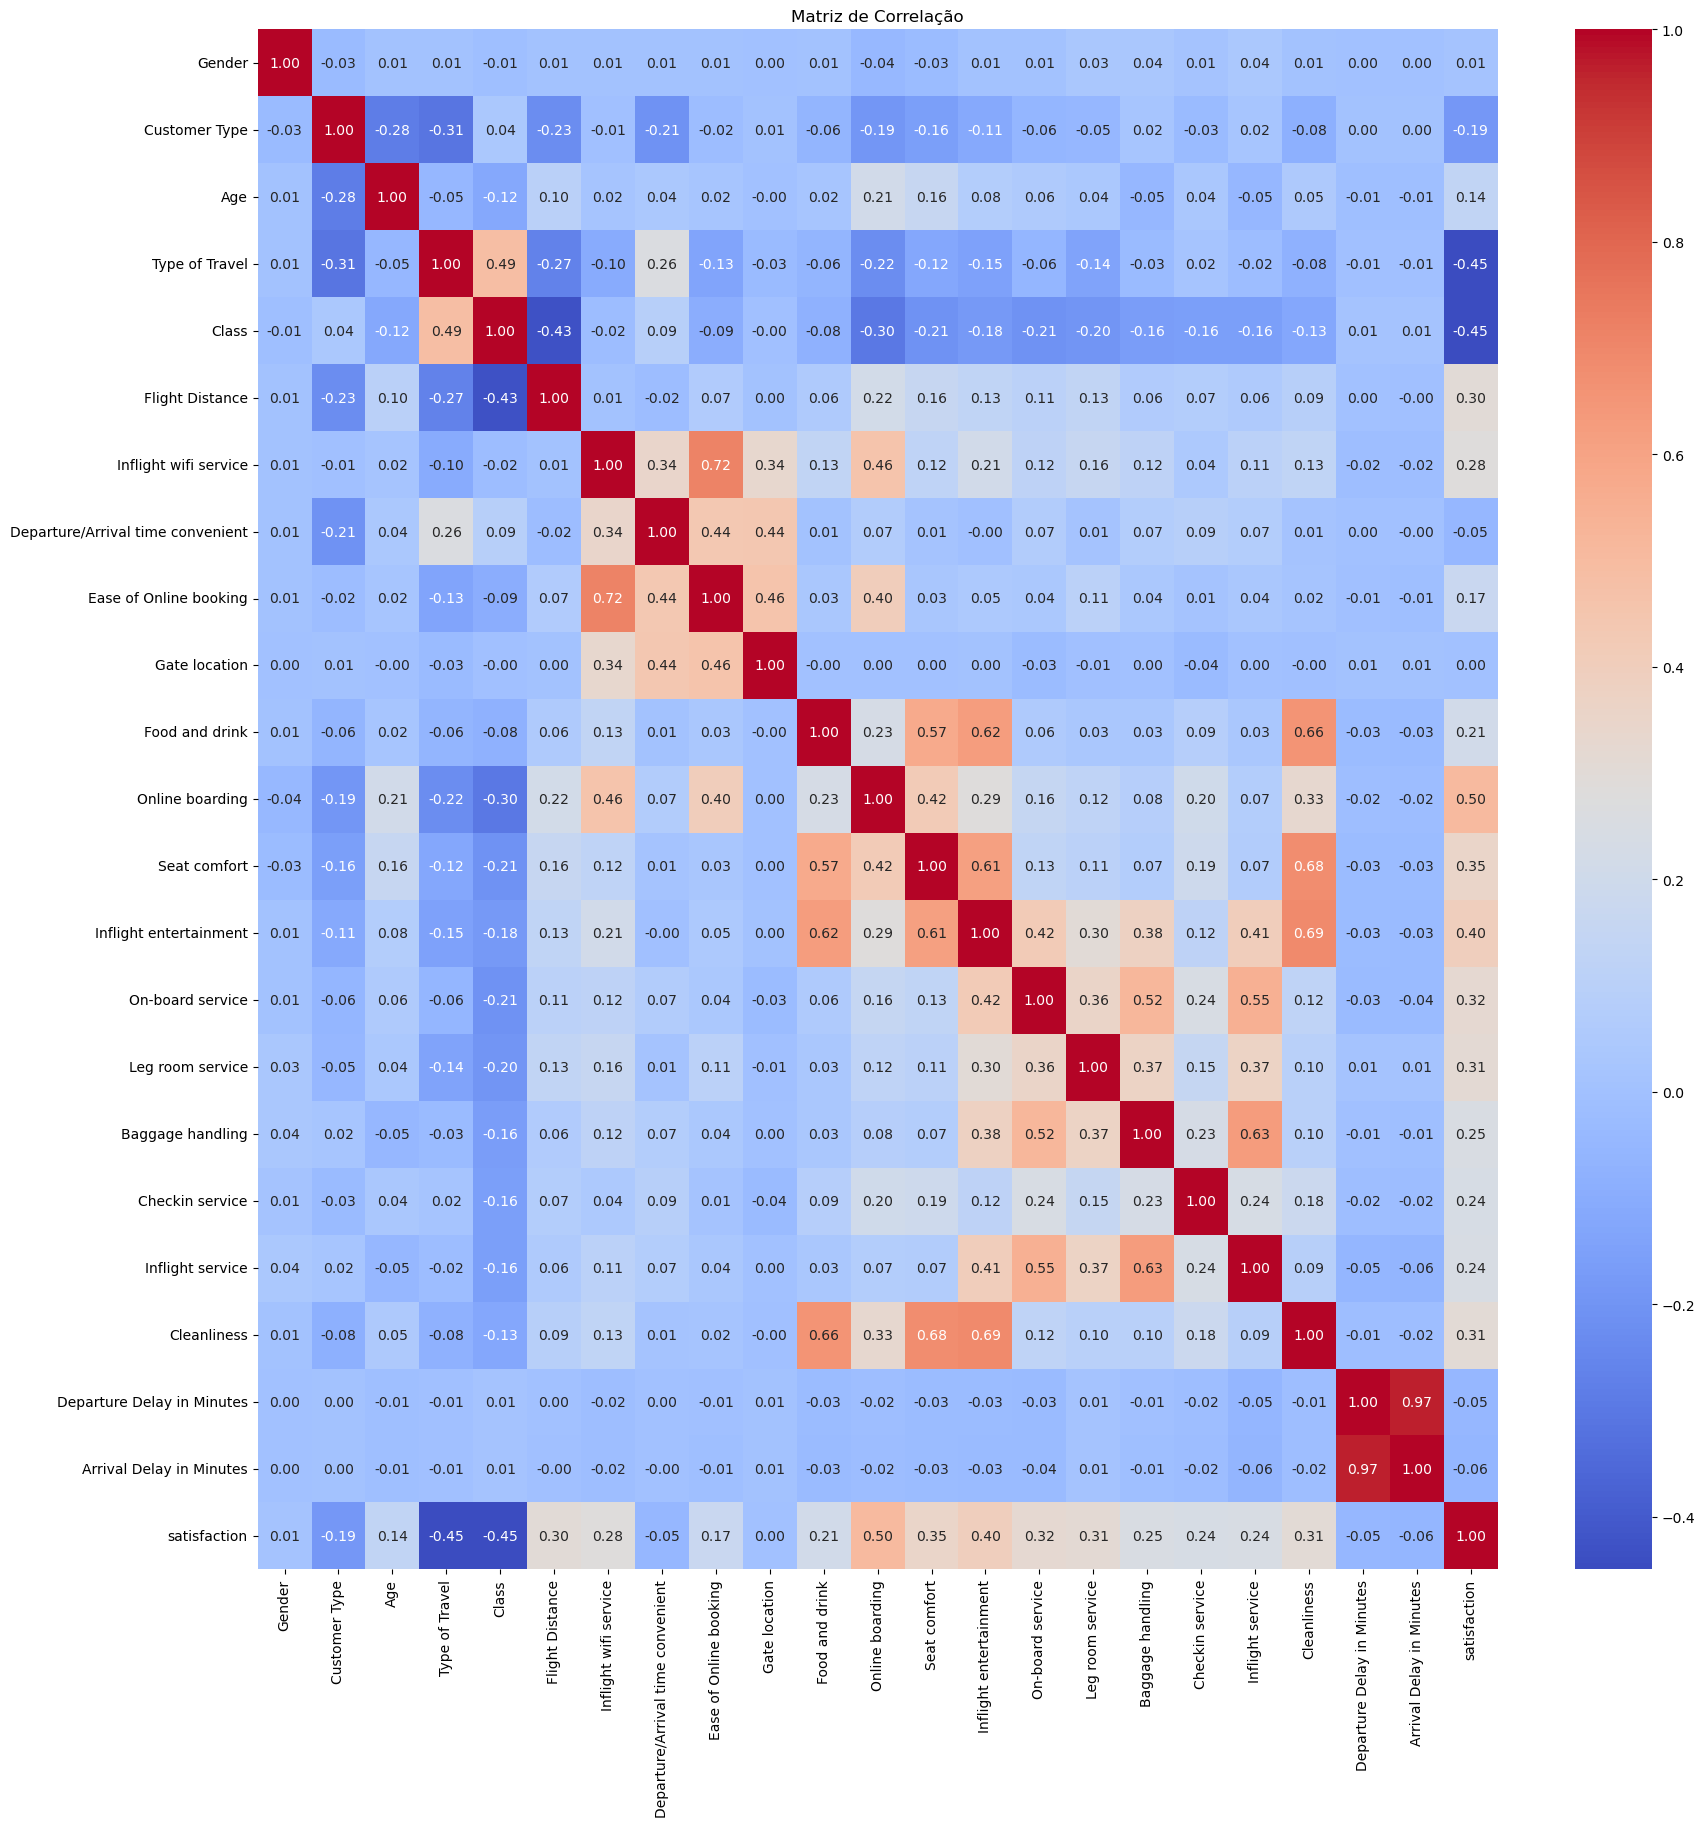

Top 10 features mais correlacionadas com a variável alvo:
Online boarding           0.503447
Inflight entertainment    0.398203
Seat comfort              0.349112
On-board service          0.322450
Leg room service          0.313182
Cleanliness               0.305050
Flight Distance           0.298915
Inflight wifi service     0.284163
Baggage handling          0.247819
Inflight service          0.244852
Name: satisfaction, dtype: float64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Criar cópia do DataFrame original para preservar os dados
base_encoded = base

# Inicializar o LabelEncoder
lencoders = {}

# Iterar sobre as colunas categóricas
for col in base_encoded.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    base_encoded[col] = lencoders[col].fit_transform(base_encoded[col])

# Calcular a matriz de correlação
correlation_matrix = base_encoded.corr()

# Plotar um heatmap da matriz de correlação
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

# Identificar as correlações com a variável alvo
target_correlation = correlation_matrix['satisfaction'].sort_values(ascending=False)

# Exibir as features mais correlacionadas com a variável alvo
n = 10
top_features = target_correlation[1:].head(n)
print("Top", n, "features mais correlacionadas com a variável alvo:")
print(top_features)

**Análise/Resultado:**

Fazendo uma análise pelo HeatMap e pelos gráficos plotados, podemos chegar a conclusão que as variaveis que mais
interferem na satisfação dos clientes foram:
Online Boarding, Inflight entertainment, Seat confort, On-board Service, Leg Room service e Cleanliness, pois a maioria dos clientes que deram nota 5 e 4 também são clientes satisfeitos.


# Modelagem
Desenvolva uma solução com o objetivo de prever a satisfação do passageiro.
> Na hora de avaliar, não estaremos tão preocupados com as métricas do modelo, mas sim com a **qualidade do código** e com **o porquê de certas decisões** durante a modelagem.

In [ ]:
import pandas as pd

In [ ]:
tabela = pd.read_csv("train.csv")

In [ ]:
#identifica todas as linhas que tem um valor vazio e exclui
tabela = tabela.dropna()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
codificador = LabelEncoder()

In [ ]:
tabela['Gender'] = codificador.fit_transform(tabela['Gender'])
tabela['Customer Type'] = codificador.fit_transform(tabela['Customer Type'])
tabela['Type of Travel'] = codificador.fit_transform(tabela['Type of Travel'])
tabela['Class'] = codificador.fit_transform(tabela['Class'])

In [ ]:
# y= coluna que quero prever
# x = coluna que são usadas para a previsao

y = tabela['satisfaction']
x = tabela.drop(columns=['Unnamed: 0','satisfaction', 'id'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#70% de treino, 30% de teste
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3)

In [ ]:
#Criação da inteligencia artificial
# Arvore de decisão e KNN

#importa a inteligencia artificial
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#cria a inteligencia artificial
modelo_arvore_decisao = RandomForestClassifier()
modelo_knn = KNeighborsClassifier()

#treinar
modelo_arvore_decisao.fit(x_train,y_train)
modelo_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
import numpy

In [ ]:
#testar os modelos
previsao_arvore = modelo_arvore_decisao.predict(x_test)
previsao_knn = modelo_knn.predict(x_test.to_numpy())

C:\Users\bru_m\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(y_test,previsao_arvore))
print(accuracy_score(y_test,previsao_knn))

0.9616783036777246
0.7432671578879629


In [ ]:
#fazer novas previsoes
tabela2 = pd.read_csv("test.csv")
tabela2.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
tabela3= tabela2.drop(columns=['satisfaction', 'id','Unnamed: 0'])
tabela3.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [ ]:
#identifica todas as linhas que tem um valor vazio e exclui
tabela3 = tabela3.dropna()

In [ ]:
tabela3['Gender'] = codificador.fit_transform(tabela3['Gender'])
tabela3['Customer Type'] = codificador.fit_transform(tabela3['Customer Type'])
tabela3['Type of Travel'] = codificador.fit_transform(tabela3['Type of Travel'])
tabela3['Class'] = codificador.fit_transform(tabela3['Class'])

In [ ]:
#Como o modelo de RandomForest foi o com melhor acurácia, seguirei com esse
previsoes = modelo_arvore_decisao.predict(tabela3)
print(previsoes)

['satisfied' 'satisfied' 'neutral or dissatisfied' ...
 'neutral or dissatisfied' 'satisfied' 'neutral or dissatisfied']


In [ ]:
tabela3.insert(0, 'id', tabela2['id'])
tabela3['previsão'] = previsoes

In [ ]:
tabela3

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,previsao
0,19556,0,0,52,0,1,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,0,0,36,0,0,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,1,1,20,0,1,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,1,0,44,0,0,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,0,0,49,0,1,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,1,1,34,0,0,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,71167,1,0,23,0,0,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,37675,0,0,17,1,1,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,90086,1,0,14,0,0,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied
